<a href="https://colab.research.google.com/github/ganeshsriprasad/Google_colab/blob/main/Building_chatbot_using_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install langgraph langsmith


In [22]:
!pip install langchain langchain_groq langchain_community

In [25]:
from google.colab import userdata
groq_api_key = userdata.get("groq-api")
langsmith_api_key = userdata.get("langsmith-api")

In [26]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langgraph"

In [27]:
from langchain_groq import ChatGroq

In [28]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name ="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c83a4099b10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c83a3eb3050>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Building chatbot using Langgraph

In [31]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

from langgraph.graph.message import add_messages

In [32]:
class State(TypedDict):
  # Messages have the type "list". The add_messages function
  #in the annotation defines how this state key should be updated
  #(in this case ,it appends messaged to the list,rather than overwriting them)
  messages :Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [33]:
graph_builder

In [34]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [35]:
graph_builder.add_node("chatbot",chatbot)

In [36]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [37]:
graph = graph_builder.compile()


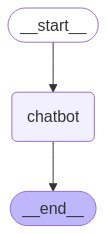

In [39]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass